In [2]:
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import scipy
# from adjustText import adjust_text
from Bio import SeqIO
from Bio.Seq import Seq
%matplotlib inline

%load_ext autoreload
%autoreload 2

import pickle

from matplotlib import gridspec
from matplotlib.gridspec import GridSpec

from itertools import combinations
from ast import literal_eval

import sys
import os

home_dir = '~/Documents/Stanford/Research/EvolvingFront/'
home_dir = os.path.expanduser(home_dir)

tools_path = f'{home_dir}/code/processing/tools/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools as tools

sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()

In [3]:
merged_fitness = p.read_csv(f'{home_dir}/data/fitness_withMutations.csv',index_col=0)

/var/folders/t0/s78ywp_n0sngtydd8db0z3_m0000gn/T/ipykernel_36739/3121953271.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(12,4))


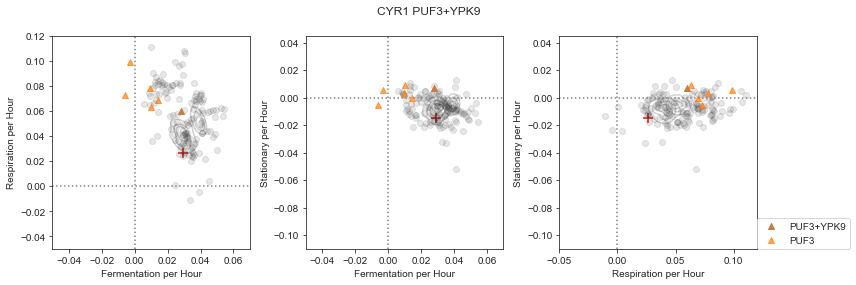

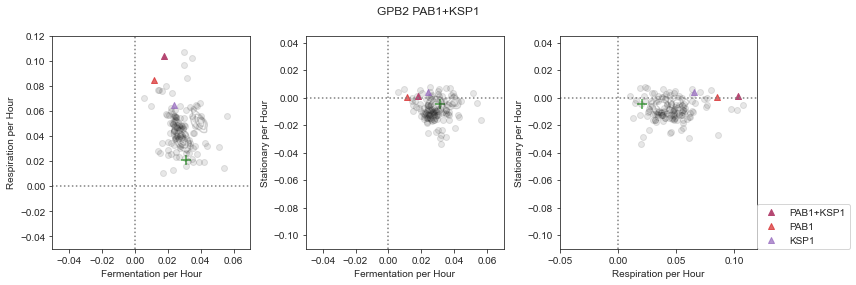

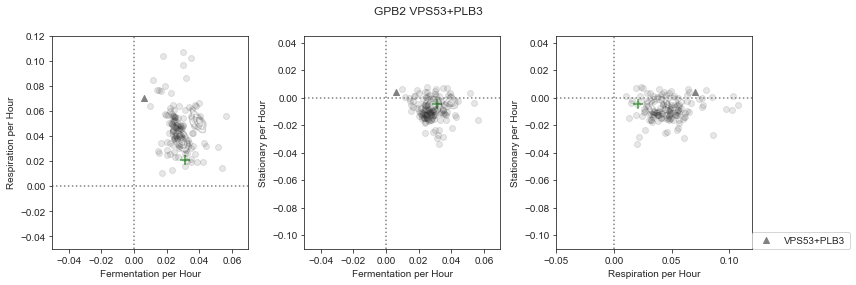

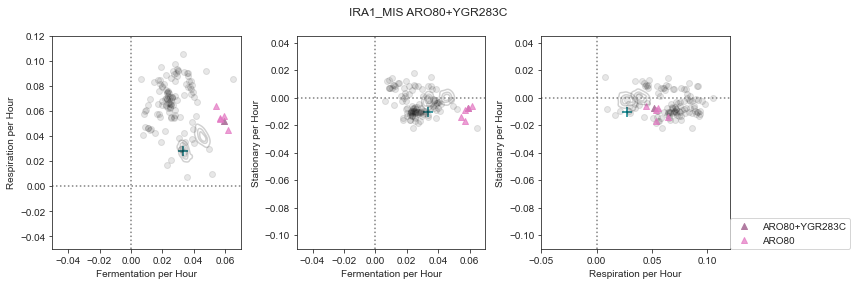

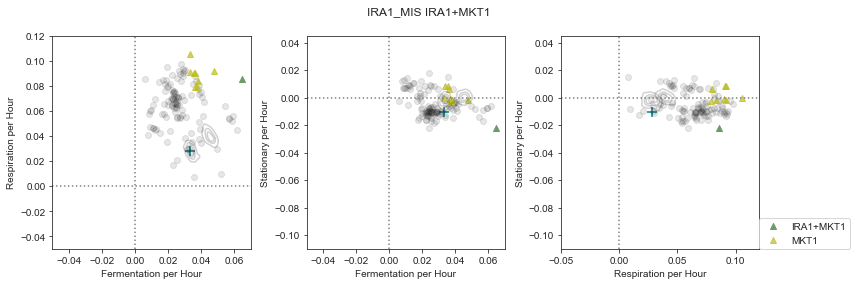

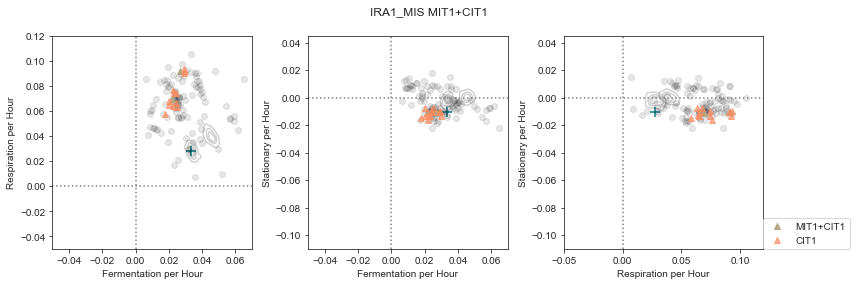

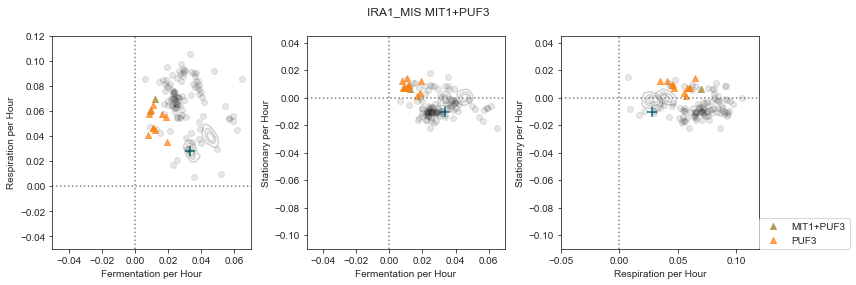

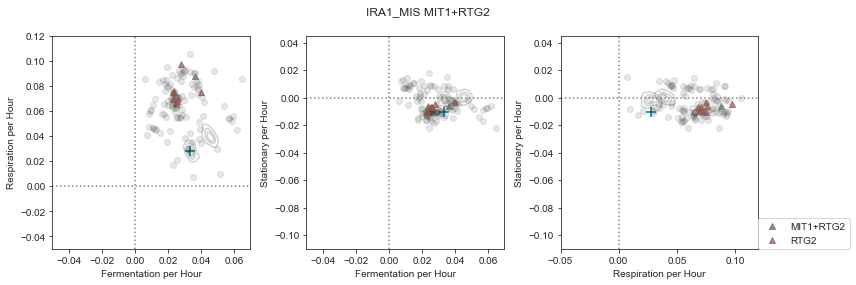

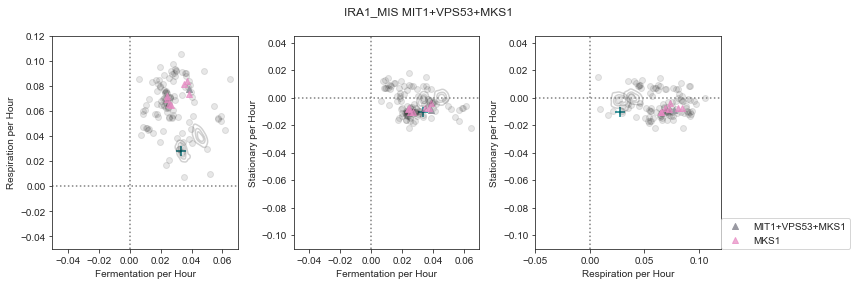

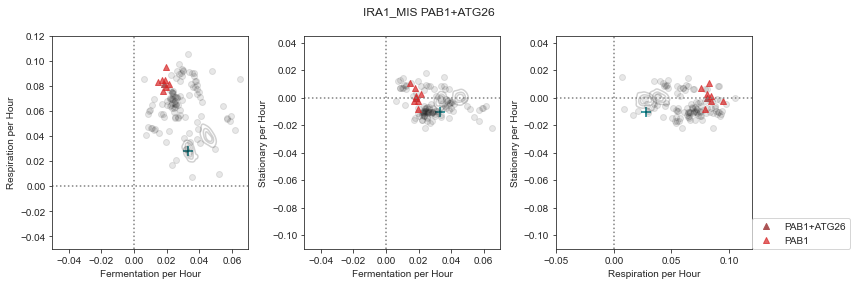

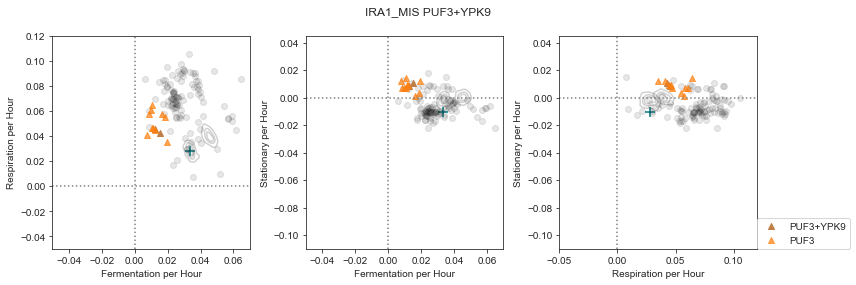

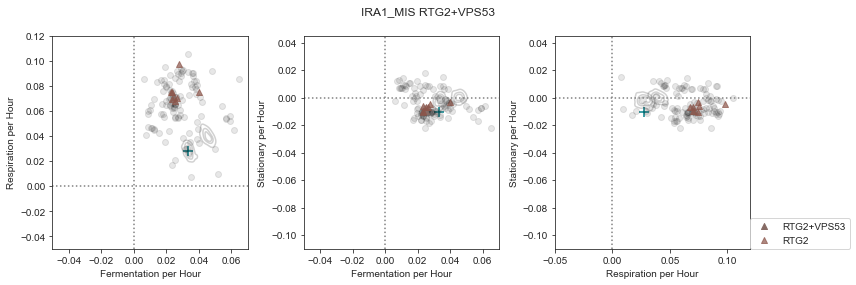

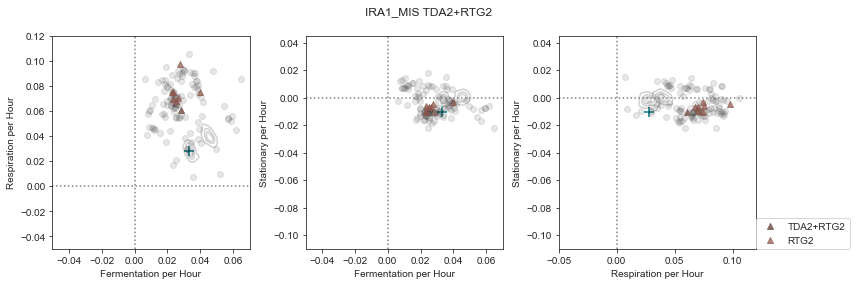

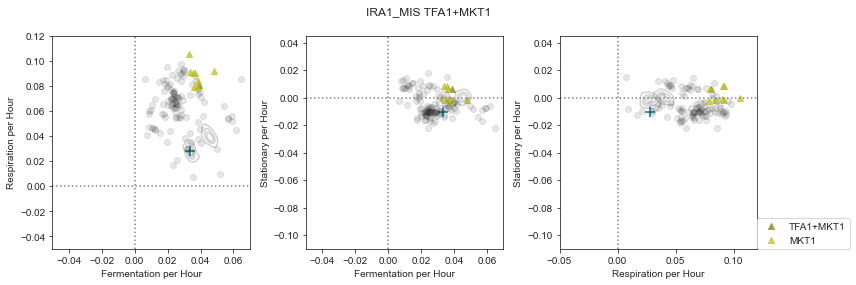

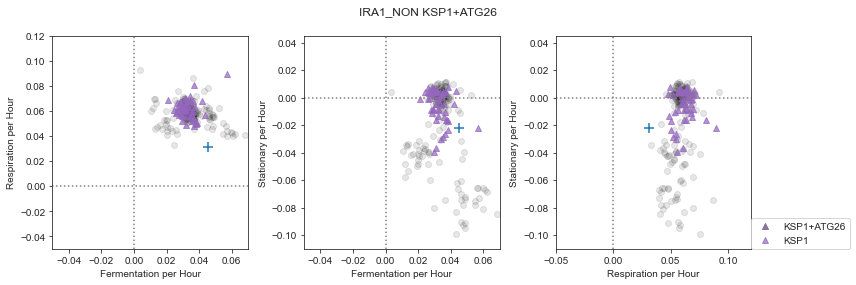

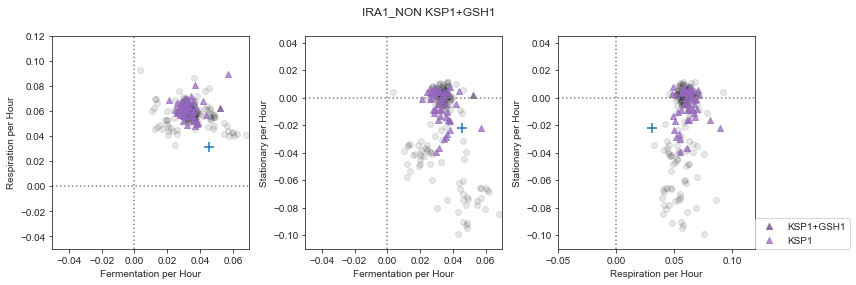

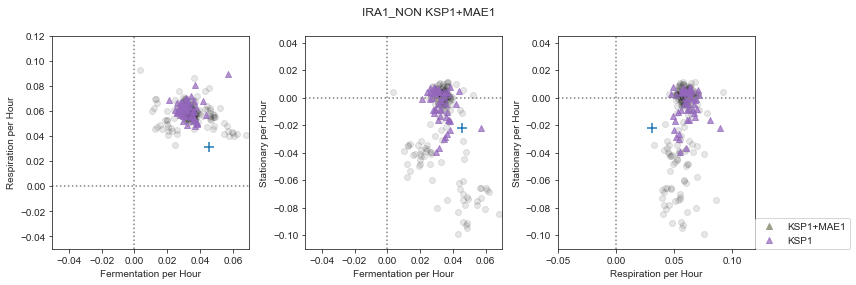

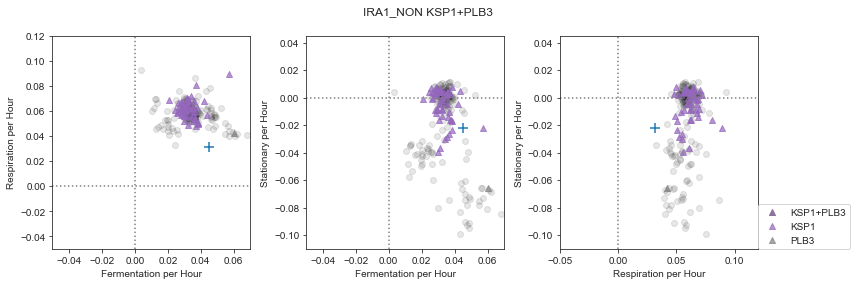

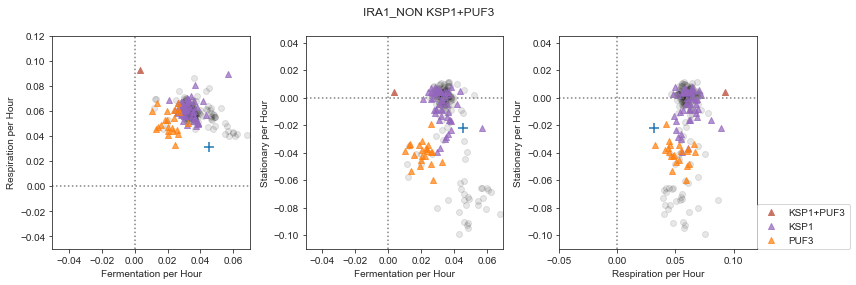

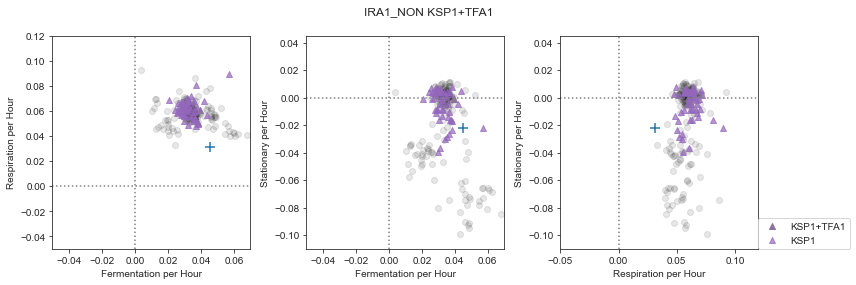

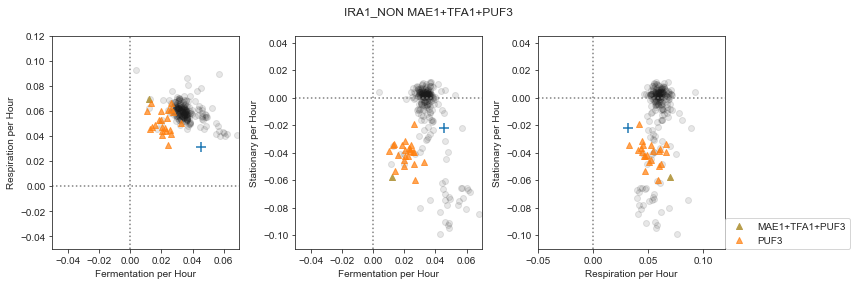

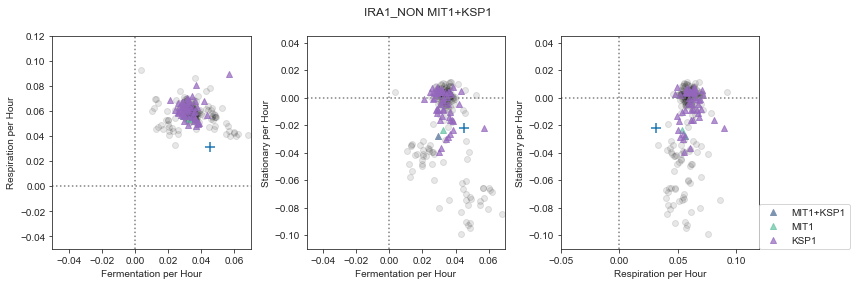

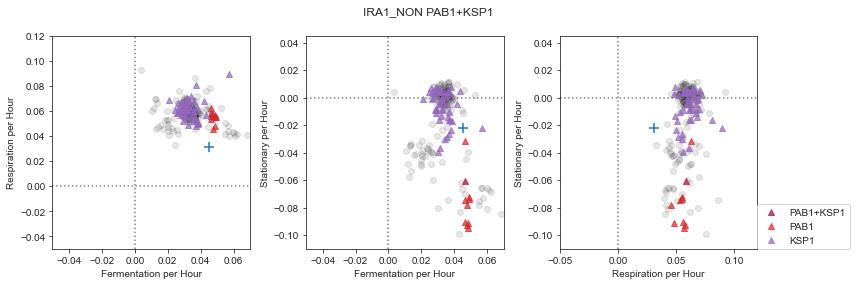

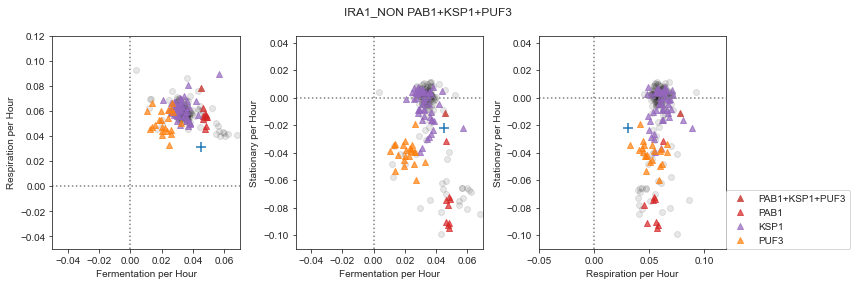

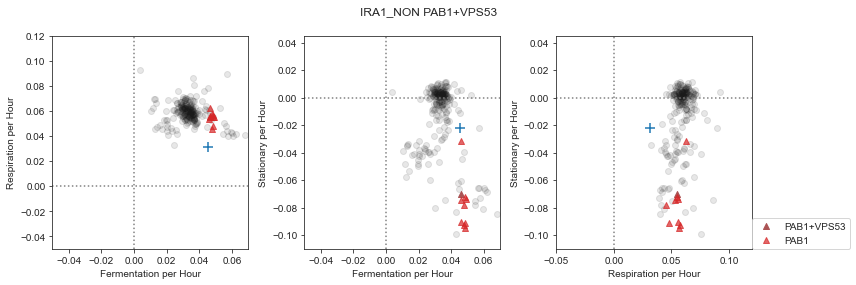

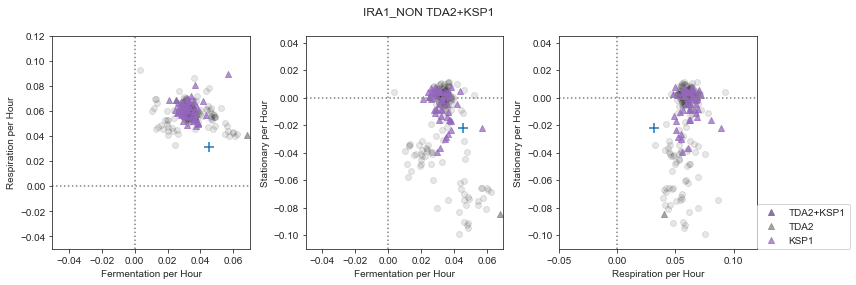

In [18]:

evo_cond_list = ['Evo1D','Evo2D','Evo3D']

ancestor_list = ['CYR1','GPB2','TOR1','IRA1_MIS','IRA1_NON']
for a,ancestor in enumerate(ancestor_list):
    
    this_anc = merged_fitness[merged_fitness['ancestor']==ancestor]
    
    these_pure_diploids = this_anc[this_anc['class_new']=='pure_diploids']['barcode'].values
    this_pure_diploid = this_anc[(this_anc['class_new']=='pure_diploids')]
    
    these_neutral_haploids = this_anc[this_anc['class_new']=='neutral_haploids']['barcode'].values
    this_neutral_haploid = this_anc[(this_anc['class_new']=='neutral_haploids')]

    interesting_muts = this_anc[~this_anc['barcode'].isin(list(these_neutral_haploids)+list(these_pure_diploids))]
    
    gene_list = np.unique([x for x in interesting_muts['gene'].values if not p.isnull(x)])
        
    double_muts = [gene for gene in gene_list if '+' in gene]
        
    for double_mut in double_muts:
        
        fig = plt.figure(figsize=(12,4))
        plt.suptitle(f'{ancestor} {double_mut}')

        single_muts = double_mut.split('+')
            
        for count,(xdata,ydata) in enumerate(combinations(['FerPerHour','ResPerHour','StaPerHour'],2)):
        
            plt.subplot(1,3,count+1)
            
            background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[ancestor]]

            plt.scatter(background_mutant[xdata].values,background_mutant[ydata].values,
                            marker='+',color=tools.anc_color_map[ancestor],s=100)

            sns.kdeplot(x=this_pure_diploid[xdata].values,y=this_pure_diploid[ydata].values,
                        color='k',alpha=0.2,thresh=0.2,levels=4)

            sns.kdeplot(x=this_neutral_haploid[xdata].values,y=this_neutral_haploid[ydata].values,
                        color='k',alpha=0.2,thresh=0.2,levels=4)
            
            
            not_featured = interesting_muts[~interesting_muts['gene'].isin([double_mut]+single_muts)]

            plt.scatter(not_featured[xdata].values,not_featured[ydata].values,
                    color='k',alpha=0.1)
    
        
            for gene in [double_mut] + single_muts:
                
                this_gene = interesting_muts[interesting_muts['gene']==gene]
                
                if len(this_gene) > 0:

                    if '+' in gene:
                        color_to_use = tools.combine_hex_values([tools.find_mutation_color(g) for g in gene.split('+')])
                        alpha_to_use = 1.0
                    else:
                        color_to_use = tools.find_mutation_color(gene)
                        alpha_to_use = 0.7

                    plt.scatter(this_gene[xdata].values,this_gene[ydata].values,
                        color=color_to_use,marker='^',label=f'{gene}',alpha=alpha_to_use)

     
            plt.xlim(tools.lims[xdata][0],tools.lims[xdata][1])
            plt.ylim(tools.lims[ydata][0],tools.lims[ydata][1])

            plt.xlabel(tools.labels[xdata])
            plt.ylabel(tools.labels[ydata])
        
            plt.axvline(0,color='gray',linestyle=':')
            plt.axhline(0,color='gray',linestyle=':')
            
            
        
#         if len(ancs) > 1:
#             for g,gene in enumerate(tools.mutation_color_map.keys()):
#                 plt.text(y=0.5-0.02*g,x=0.02,s=f'{gene}',color=tools.mutation_color_map[gene],transform=plt.gca().transAxes)
        plt.legend(loc=(1,0))
        plt.tight_layout()
        plt.savefig(f'{home_dir}/figures/analysis/epistasis/epistasis_{ancestor}_{double_mut}.pdf',bbox_inches='tight')

